# Predicting Blood Donations: Initial Data Exploration

To do:
 - Import data
 - Clean data
 - Visualize data

----
## Import the data

Functions used:
 - `pandas.read_csv`
 - `[pandas df].head()`

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np

data_dir      = '../data/raw/'
data_filename = 'blood_train.csv'
df_blood      = pd.read_csv(data_dir+data_filename)

-----
## Clean Data

- Are there any __missing values__?

### First look at the datapoints within the data

In [42]:
df_blood.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


-----
## Visualize Data


### Table: Summary Statistics

To get a feel for the data as a whole.



Functions Used:
 - `[pandas df].iloc()`
 - `[pandas df].describe()`

In [44]:
df_blood.iloc[:, 1:].describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


Insights from Summary stats table:

| Variable | Value     | Interpretation    |
|----:     |:----:      |:----              |
| Number of data points _N_                  | __576__    | _Not too big of a dataset_   |
| Average number of donations in March, 2007 | __0.2396__ | _Whether blood was donated in March was low in general_   |
| Max Months since 1st Donation              | __98__     | _Earliest donation was 98 months (~8 years) ago_ |
| Average number of donations                | __5.427__     | _People in dataset donate an average of ~5.5 times_ |


## Plot: Scatter Matrix of all of the variables + histograms

Note:
- `Number of donations` & `Total Volume Donated` are perfectly correlated
  - thus can probably drop one of the variables
- More likely to NOT have donated in March 2008 (from `Made Donation` histogram)

/Users/jason/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


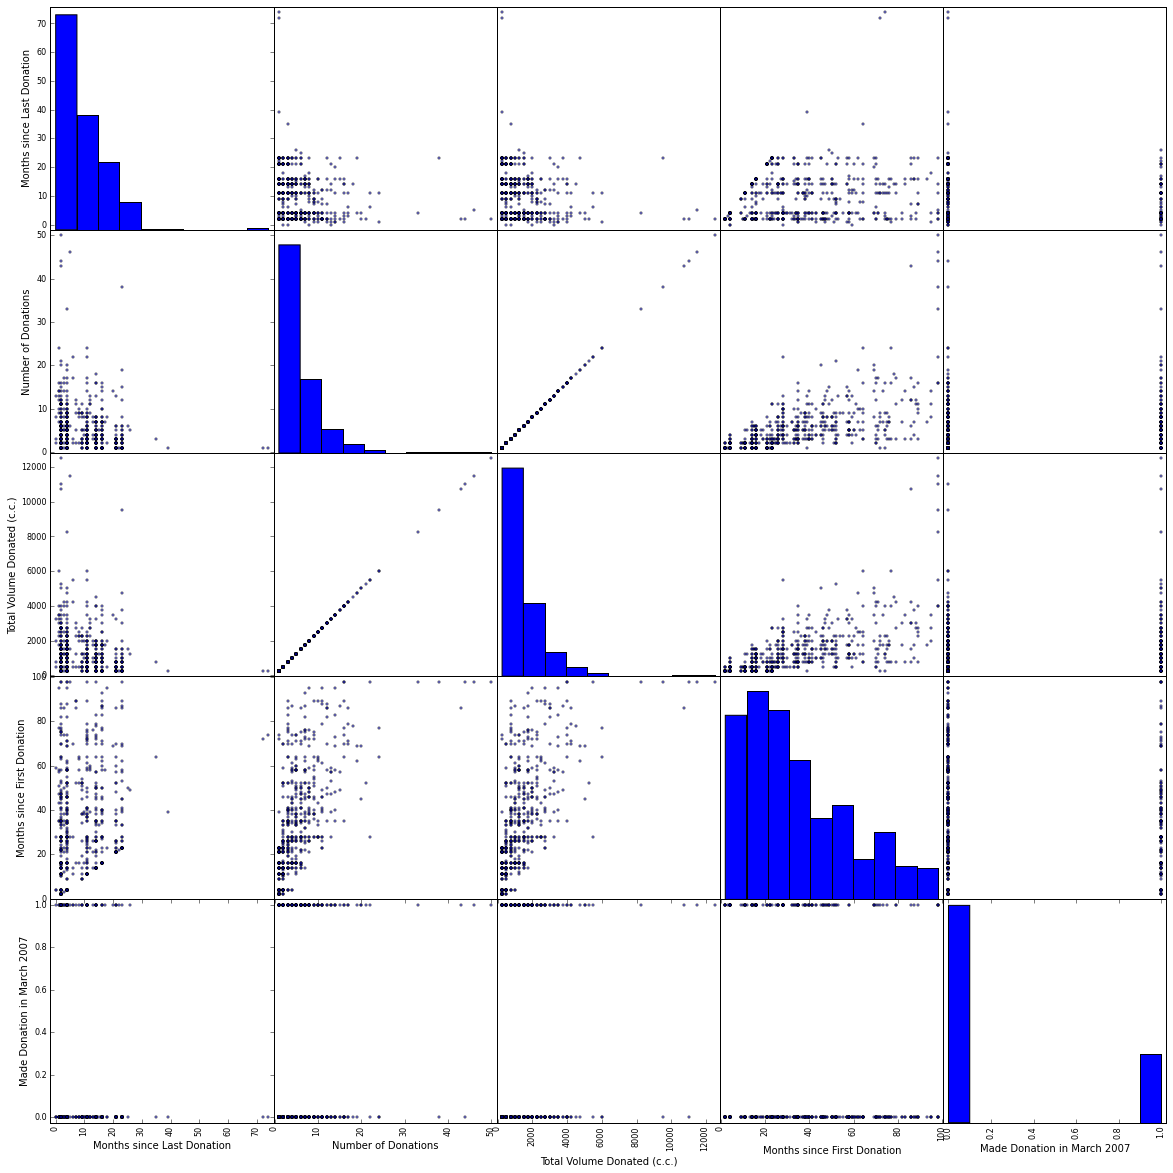

In [45]:
plot_scatter = pd.scatter_matrix(df_blood.iloc[:, 1:], 
                                 figsize=(20,20))

In [46]:
pd.scatter_matrix?

## Plot data as a scatter plot (w/r 'Made Donations in March 2007')

In order to visually inspect whether the given data is __linearly separable__
 - want to create scatter plots of the data (like those in _Abu-Mostafa, et al., 2012_)![Linearly separable data](./images/abu-mostafa_2012-linearly_separable_data.png)

 

### 1-dimensional Scatterplot _Number of Donations_ ~ _Made Donation in March 2007_

Starting with a simple 1-dimension scatterplot 

/Users/jason/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


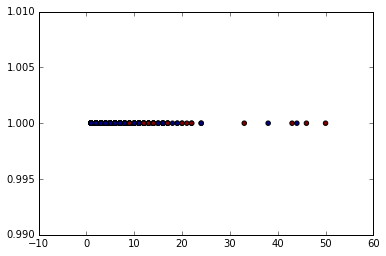

In [25]:
Ndatapoints = df_blood.count()
Ndatapoints = Ndatapoints[1]

plt.scatter(x=df_blood['Number of Donations'], 
            y=[1]*Ndatapoints,
            c=df_blood['Made Donation in March 2007'])